# FOUNDATIONS OF INFERENCE

Importação das bibliotecas:

In [1]:
# Importação das bibliotecas
library(tidyverse)
library(ggplot2)
# Nossa discussão será sobretudo sobre ferramentas da biblioteca infer!
library(infer)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'infer' was built under R version 3.6.3"

## CAPÍTULOS 1, 2 e 3:

#### INFERÊNCIA ESTATÍSTICA:
- **Processo de fazer afirmações sobre uma população baseadas nas informações contidas em uma amostra.**

<img src="inferecia_JPG.JPG">

**Exemplo 1:** Em 1818, o doutor húngaro Ignaz Semmelweis e seus assistentes buscavam um meio para diminuir a incidência de infecções pós parto no hospital que trabalhavam. 

- Clínica 1: os estudantes eram **encorajados a lavar suas mãos** após seus estudos e a **taxa de mulheres que apresentavam infecções pós-parto era relativamente baixa**.

- Clínica 2: os estudantes **não tinham o hábito de lavar suas mãos** após seus estudos e **a taxa de mulheres que apresentavam infecções pós-parto era bastante elevada**.

Para estudar se as mulheres atendidas por médicos que não lavaram as mãos tinham maior tendência a desenvolver infecções, não é necessário comparar toda a população desses dois grupos, apenas amostras razoáveis das duas categorias. 

O projeto está disponível em https://projects.datacamp.com/projects/49

#### TESTE DE HIPÓTESES:
O processo de realizar um teste de hipóteses deve partir da **tentativa de rejeitar a hipótese nula**:

- **HIPÓTESE NULA (H0)**: a hipótese nula **normalmente parte do princípio que os dois fenômenos observados não possuem relação**, e é aquela cuja falsidade se tenta provar através de um teste de hipóteses.
    

- **HIPÓTESE ALTERNATIVA (HA)**: a hipótese alternativa corresponde à **hipótese que quer ser testada pelo estudo**.


#### AMOSTRAS NULAS:
- São **amostras permutadas repetidamente e aleatoriamente** por uma quantidade N de vezes de modo que as **variáveis de estudo** podem ser tomadas como **independentes** -> são as amostras observáveis caso a hipótese nula seja verdadeira! 
    - Ex: das populações de mulheres atendidas por alunos que lavaram as mãos e atendidas por alunos que não as lavaram, a distribuição se dará de modo a **não haver relação entre a higienização das mãos e o nível de infecções!**

## EXEMPLO: GENDER INEQUALITY 

**H0**: Homens e mulheres são promovidos com a mesma probabilidade -> **gênero e promoção são variáveis independentes!**

**HA**: Há diferenças significativas (possivelmente advindas de ações descriminatórias) entre a taxa de homens e mulheres promovidos -> **Homens são promovidos a uma taxa maior do que mulheres**.

In [5]:
# Importação dos dados:
discrimination_dataset <- readRDS('C:/Users/lordo/Documents/FEA.dev/R/disc_big.rds')
#discrimination_dataset

In [6]:
# Quantidade de homens e mulheres promovidos e não promovidos:
discrimination_dataset %>%
    count(sex, promote)

sex,promote,n
female,not_promoted,100
female,promoted,140
male,not_promoted,30
male,promoted,210


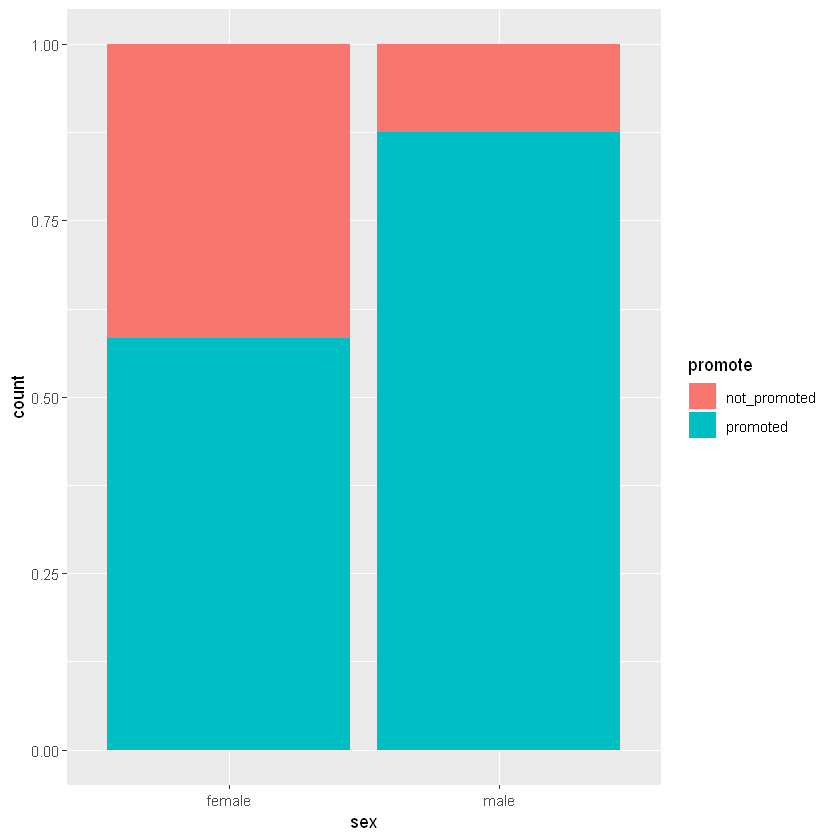

In [7]:
# Visualizando a distribuição original:
ggplot(discrimination_dataset, aes(x = sex, fill = promote)) + 
  geom_bar(position = 'fill')

In [8]:
# Em segundo lugar, vamos comparar a proporção de homens e mulheres que foram promovidos:
diff_orig <- discrimination_dataset %>%
    group_by(sex) %>%
    summarize(promoted_prop = mean(promote == "promoted")) %>% 
    summarize(diff(promoted_prop)) %>%
    pull()

diff_orig

[1] 0.2916667

Sabendo da diferença de quase 30% entre a quantidade de homens e mulheres promovidos, a questão que se desenvolve é a seguinte: **seria possível observar tamanha diferença em um cenário em que os dois gêneros possuem a mesma probabilidade de serem promovidos?**
- Para responder a questão, primeiro é necessário **permutar** (shuffle) **os dados** de modo a não haver **nenhuma relação entre gênero e promoção.**
- O processo de permutação faz com que as duas variáveis não sejam relacionadas, possibilitando a **identificação da variabilidade natural das diferenças** nas taxas de promoção.
- Sabendo da variabilidade natural (slide 12), é possível aferir o quão grande a diferença deveria ser para que identifiquemos algo incomum na amostra - hipótese alternativa.

### Permutando os dados:

In [9]:
# disc_perm corresponde ao conjunto de dados repetidos cuja variável promote foi permutada de 
# modo a não existir nenhuma correlação entre as variáveis!

disc_perm <- discrimination_dataset %>%
  specify(promote ~ sex, success = "promoted") %>%
  hypothesize(null = "independence") %>%
  generate(reps = 5, type = "permute")

disc_perm

promote,sex,replicate
promoted,male,1
promoted,male,1
promoted,male,1
not_promoted,male,1
promoted,male,1
promoted,male,1
not_promoted,male,1
not_promoted,male,1
promoted,male,1
promoted,male,1


In [10]:
# Observando os dados permutados:
disc_perm %>%
  group_by(replicate) %>%
  count(sex, promote)

replicate,sex,promote,n
1,female,not_promoted,58
1,female,promoted,182
1,male,not_promoted,72
1,male,promoted,168
2,female,not_promoted,67
2,female,promoted,173
2,male,not_promoted,63
2,male,promoted,177
3,female,not_promoted,70
3,female,promoted,170


In [11]:
# Calcula-se as diferenças em proporção de homens e mulheres promovidos nas 5 permutações:
disc_perm %>%
  calculate(stat = "diff in props", order = c("male", "female"))

replicate,stat
1,-0.05833333
2,0.01666667
3,0.04166667
4,0.07500000
5,0.00000000


Agora, vamos extrapolar as 5 permutações para, por exemplo, mil:

In [12]:
disc_perm <- discrimination_dataset %>%
  specify(promote ~ sex, success = "promoted") %>%
  hypothesize(null = "independence") %>%
  generate(reps = 1000, type = "permute") %>%
  calculate(stat = "diff in props", order = c("male", "female"))

disc_perm

replicate,stat
1,-0.025000000
2,0.033333333
3,0.025000000
4,-0.033333333
5,-0.008333333
6,-0.025000000
7,-0.041666667
8,0.000000000
9,-0.058333333
10,-0.075000000


In [13]:
# Observando para os quantis de 5%, 90%, 95% e 99%
# Lembre-se, a REGIÃo CRÍTICA corresponde ao intervalo entre os quantis 5% e 95%
disc_perm %>% 
  summarize(
    q.05 = quantile(stat, p = .05),
    q.90 = quantile(stat, p = .90),
    q.95 = quantile(stat, p = .95),
    q.99 = quantile(stat, p = .99)
  )

q.05,q.90,q.95,q.99
-0.06666667,0.05,0.06666667,0.09175


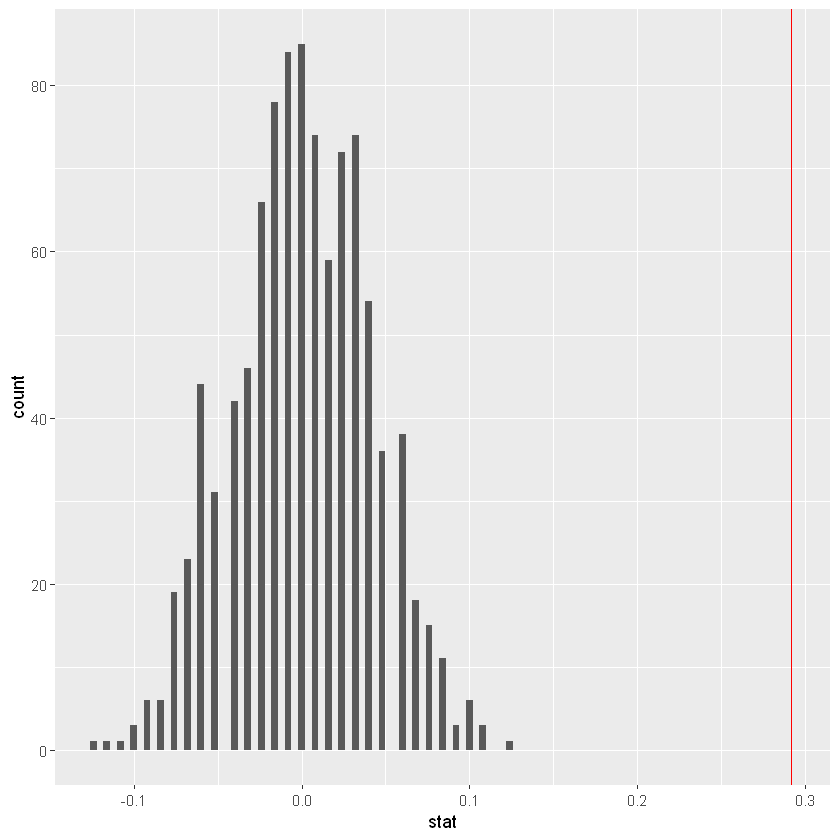

In [14]:
# Plotando a diferença entre a distribuição dos p-hats das amostras permutadas com a diferença da observação original: 
ggplot(disc_perm, aes(x = stat)) + 
  geom_histogram(binwidth = 0.004) +
  geom_vline(aes(xintercept = diff_orig), color = "red")

#### Conclusão: a estatística observada está muito distante da distribuição normal que seria visualizada caso a hipótese nula fosse verdadeira - se não houvesse relação entre gênero e promoção.

## P-VALOR
- O P-valor é a **probabilidade de observar dados tão ou mais extremos que o que temos dado que a hipótese nula é verdadeira.**
- No caso da disferença entre os gêneros, o p-valor é a probabilidade de observar uma diferença maior ou igual a 0.29 (diff_orig) quando as taxas de promoção não variam de acordo com o gênero.
- É a proporção das diferenças permutadas que são menores ou iguais à diferença observada
    - Normalmente, assume-se que um **P-valor menor ou igual a 0.05 pode indicar que os dados observados são inconsistentes com a hipótese nula** -> apenas uma a cada 20 "amostras nulas" apresentaria um p-hat similar à diferença observada!  

Para observar o P-value dos dados, basta usar as funções visualize() e get_p_value() do pacote infer:

Warning message:
"`visualize()` should no longer be used to plot a p-value. Arguments `obs_stat`, `obs_stat_color`, `pvalue_fill`, and `direction` are deprecated. Use `shade_p_value()` instead."Warning message:
"Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information."

p_value
0


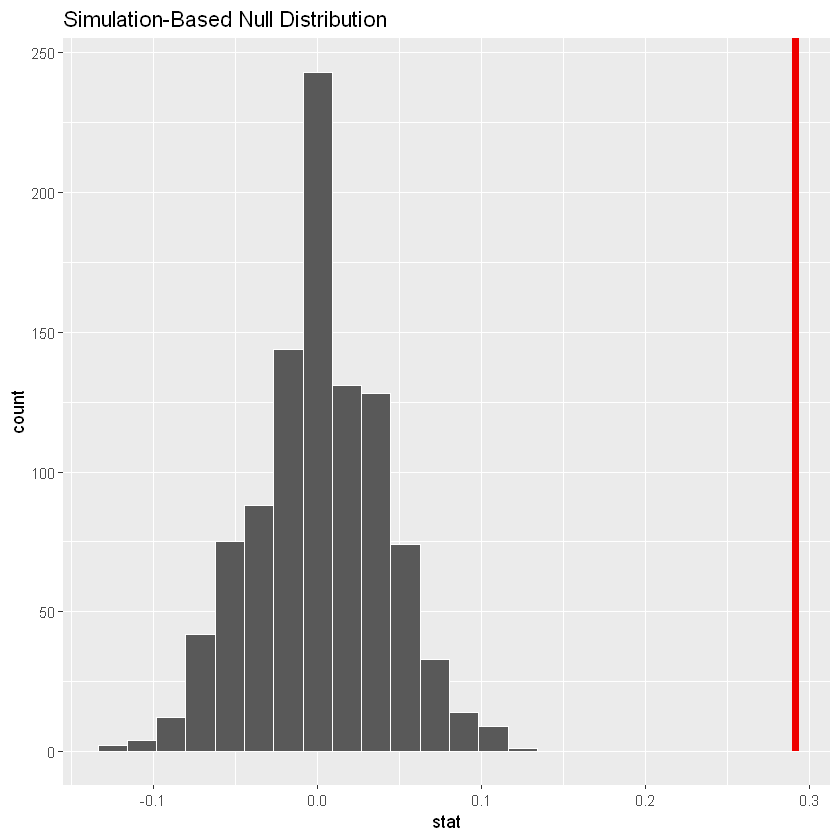

In [15]:
disc_perm %>%
  visualize(obs_stat = diff_orig, direction = "greater")

disc_perm %>%
  get_p_value(diff_orig, direction = 'greater')

Como o P-valor foi zero, é possível concluir que a possibiilidade da hipótese nula ser válida - a de igualdade entre homens e mulheres - é ZERO!

## TIPOS DE ERROS

<img src="erros.JPG">

<img src="tipos_erros_meme.jpg">

## CAPÍTULO 4 - INTERVALOS DE CONFIANÇA

#### Perguntas de Pesquisa:
- **Teste de HIPÓTESES**:
    - Questões comparativas -> Qual é a relação entre X e Y?
        - Ex: O nível educacional de um indivíduo impacta sua renda per capita?
    - Observa como as amostras de uma distribuição nula variam, comparando P-HAT e P:
        - P-HAT (estatística) -> proporção da amostra que atende à determinada condição   
        - P (parâmetro) -> proporção da população que atende à determinada condição

- **Teste de INTERVALOS DE CONFIANÇA**:
    - Questões de estimativa -> Qual é o impacto de X em Y? 
        - Ex: Quanto uma unidade a mais de educação aumenta o nível médio da renda per capita?
    - Não explora a distribuição nula, mas quer entender como as amostras da população de interesse variam:
        - Tenta medir a distância entre a estatística (P-HAT) e o parâmetro (P)

### PARÂMETRO
- Valor médio/proporção do conjunto da população que satisfazem à condição X.
    - Ex: Renda média de todos os indivíduos da população com determinado nível de educação.

### INTERVALO DE CONFIANÇA
- Intervalo de números que (razoávelmente) captura o verdadeiro valor do parâmetro da população.
    - Ex: Temos A% de certeza que indivíduos com um nível de educação B têm de C% a D% de chance de ter uma renda média E. 

### BOOTSTRAPPING

<img src="bootstrap.JPG">

### ERRO PADRÃO
- Descreve o quanto a estatística da amostra original varia ao redor do parâmetro da população original.
    - Para achar a variabilidade da estatística da amostra original, deve-se usar as estatísticas das reamostragens, os chamados p-hat*

- Para tentar garantir que a variabilidade do P-HAT* seja o mais fiel possível à variabilidade da amostra original, deve-se repetir a reamostragem com substituição n' = n vezes, sendo n o número de elementos da amostra original.
    - Ex: para uma amostra com 100 observações, deve-se fazer 100 reamostragens com repetição
    - Se n' < n, o ERRO PADRÃO será MAIOR do que o esperado
    - Se n' > n, o ERRO PADRÃO será MENOR do que o esperado

#### Exemplo: TAXA DE COMPLICAÇÔES DE SAÚDE POR COVID-19 
- Suponhamos que fomos contratados por um laboratório de Wuhan no ínicio de 2020, logo no começo da pandemia, e o nosso objetivo é estimar - dos indivíduos que possuímos dados (amostra da população) - quantos desenvolveram quadros mais graves da doença.  

In [3]:
covid_pop_original <- data.frame(doente = c(rep("não", 2475), rep("sim", 525)))

# Calculando o parâmetro observada dentro do dataframe da população
covid_pop_original_prop <- covid_pop_original %>%
    summarize(stat = mean(doente == "sim"))

covid_pop_original_prop

stat
0.175


In [4]:
# tamanho da amostra = 300 indivíduos
covid_pop_data <- data.frame(
    amostra = c(rep(1, 300), rep(2, 300), rep(3, 300), rep(4, 300), rep(5, 300),
                rep(6, 300), rep(7, 300), rep(8, 300), rep(9, 300), rep(10, 300)), 
    doente = c(rep("não", 250), rep("sim", 50), rep("não", 238), rep("sim", 62),
             rep("não", 255), rep("sim", 45), rep("não", 242), rep("sim", 58),
             rep("não", 253), rep("sim", 47), rep("não", 250), rep("sim", 50), 
             rep("não", 240), rep("sim", 60), rep("não", 253), rep("sim", 47), 
             rep("não", 260), rep("sim", 40), rep("não", 234), rep("sim", 66))
    )

In [5]:
# Calculando a proporção de doentes por amostra dentro do dataframe da população:
# Isso é importante pois irá demonstrar a variabilidade do p-hat! (caso fosse possível visualizá-lo)
covid_pop_props <- covid_pop_data %>%
    group_by(amostra) %>%
    summarize(stat = mean(doente == "sim"))

covid_pop_props

amostra,stat
1,0.1666667
2,0.2066667
3,0.1500000
4,0.1933333
5,0.1566667
6,0.1666667
7,0.2000000
8,0.1566667
9,0.1333333
10,0.2200000


In [6]:
# Para fazer o bootstrapping, vamos selecionar uma amostra aleatória, aqui denotada por covid_sample
covid_sample <- covid_pop_data %>%
    filter(amostra == 4) %>%
    select(doente)

covid_sample %>%
    count(doente)

doente,n
não,242
sim,58


In [7]:
# Fazendo o bootstrapping e extraindo o p-hat* das reamostragens: 
covid_sample_props <- covid_sample %>%
  specify(response = doente, success = 'sim') %>%
# Note que o valor de reps é igual ao valor de observações da amostra selecionada! 
  generate(reps = 300, type = 'bootstrap') %>% 
  calculate(stat = 'prop')

covid_sample_props

replicate,stat
1,0.1800000
2,0.2133333
3,0.1833333
4,0.1900000
5,0.1733333
6,0.1700000
7,0.1500000
8,0.2200000
9,0.1933333
10,0.1766667


### VARIABILIDADE DO P-HAT

O objetivo do de criar um intervalo de confiança é de encontrar uma faixa de valores razoáveis para o parâmetro da população.

- Problema: A estatística observada (p-hat) é uma boa estimativa, mas não é possível saber a distância do p-hat para a estatística p apenas observando a amostra de dados.
    - Solução: Calcular a variabilidade das estatísticas p-hat* fornece uma medida da distância entre o p-hat observado e o parâmetro p.


- OBS: os slides do Datacamp demonstram que se tomarmos uma distribuição via bootstrap e compararmos com a distribuição feita com toda a população, será possível observar forte convergência entre os dados da variabilidade do p-hat.


In [21]:
# Calculando a variabilidade da estatística das ***amostras do bootstrap*** -> ERRO PADRÃO:
covid_sample_props %>% 
  summarize(variability = sd(stat))

variability
0.02211456


In [22]:
# Calculando a variabilidade do p-hat das amostras da ***população original***:
covid_pop_props %>% 
  summarize(variability = sd(stat))

variability
0.02820778


In [23]:
# Calculando o p-hat da ***amostra original***:
p_hat <- covid_sample %>%
  summarize(stat = mean(doente == 'sim')) %>%
  pull()

p_hat

[1] 0.1933333

Agora que já encontramos a variabilidade do p-hat da amostra original (impossível, dado que temos apenas uma amostra), vamos encontrar o intervalo de confiança dos dados fornecidos pelas reamostragens!

In [24]:
# Pela Regra Empírica (intervalo t) - aprox. 95% das reamostragens vão produzir p-hat* dentro de um intervalo de 2
# erros padrão do p-hat da amostra original:
covid_sample_props %>%
  summarize(
    lower = p_hat - 2 * sd(stat),
    upper = p_hat + 2 * sd(stat)
  )

lower,upper
0.1491042,0.2375625


In [25]:
# Pelo cálculo dentro do quantil estabelecido:
percentile_ci <- covid_sample_props %>% 
  get_confidence_interval(level = 0.95)

percentile_ci

lower_ci,upper_ci
0.15,0.2350833


Warning message:
"`visualize()` should no longer be used to plot a confidence interval. Arguments `endpoints`, `endpoints_color`, and `ci_fill` are deprecated. Use `shade_confidence_interval()` instead."

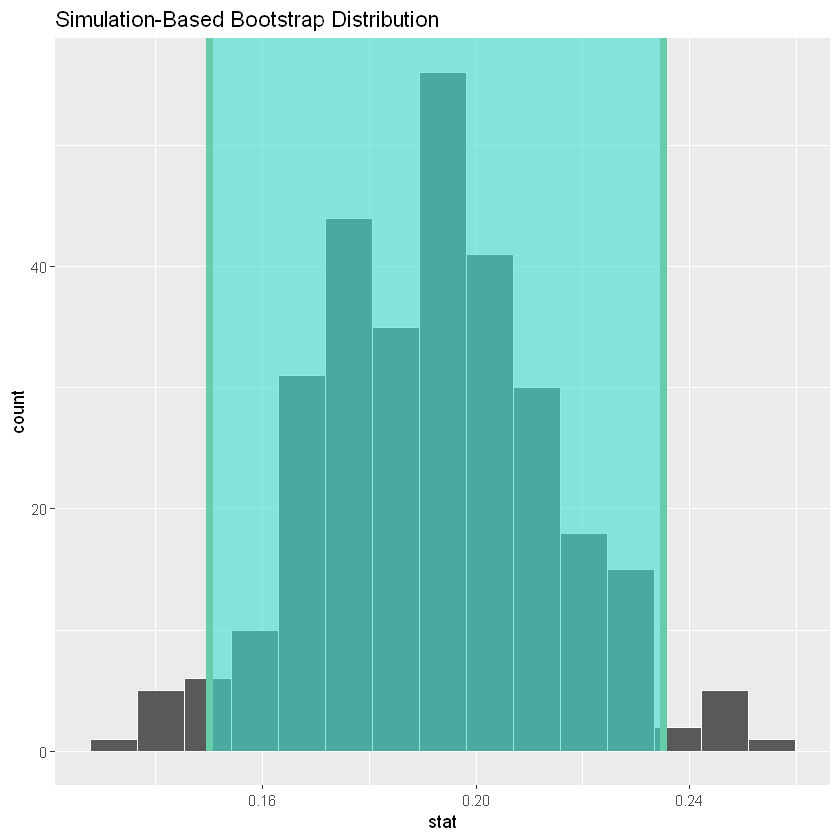

In [26]:
covid_sample_props %>% 
  visualize(endpoints = percentile_ci, direction = 'between')

In [19]:
data <- read.csv("C:/Users/lordo/Documents/FEA.dev/R/causal_inference/online_classroom.csv")

In [20]:
head(data)

X,gpa,cum_total_crds,gender,asian,black,hawaiian,hispanic,unknown,white,...,format_ol,format_blended,sat_math_NEW,sat_verbal_NEW,enroll_count,format_f2f_v_ol,format_f2f_v_blended,format_combined_v_f2f,falsexam,experiment1
0,2.014,63,1,0,0,0,0,0,1,...,0,0,540,540,NA,0,0,1,0,0
1,3.720,33,1,0,0,0,0,0,1,...,0,0,590,630,NA,0,0,1,0,0
2,NA,4,0,0,0,0,0,0,1,...,0,0,650,570,NA,0,0,1,0,0
3,NA,10,1,NA,NA,NA,NA,NA,NA,...,0,0,690,690,NA,0,0,1,0,0
4,NA,0,0,0,1,0,0,0,0,...,0,0,480,420,NA,0,0,1,0,0
5,NA,14,1,0,0,0,0,0,1,...,0,0,670,640,NA,0,0,1,0,0


In [53]:
online <- data %>%
    filter(format_ol == 1) %>%
    select(falsexam)

In [54]:
face_to_face <- data %>%
    filter(format_ol == 0) %>%
    filter(format_blended == 0) %>%
    select(falsexam)

In [55]:
head(online)

falsexam
83.30000
0.00000
88.34996
73.37000
83.30000
80.05000


In [70]:
se <- function(y){
    return (sd(as.numeric(unlist(y))) / sqrt(length(as.numeric(unlist(y)))))
}

paste("SE for Online:", se(online))
paste("SE for Face to Face:", se(face_to_face))

[1] "SE for Online: 2.91964766769501"

[1] "SE for Face to Face: 2.12808961042319"

In [74]:
disc_perm <- discrimination_dataset %>%
  specify(falsexam ~ format_ol) %>%
  hypothesize(null = "independence") %>%
  generate(reps = 5, type = "permute")

disc_perm

ERROR: Error in eval(lhs, parent, parent): objeto 'discrimination_dataset' não encontrado


In [76]:
disc_perm <- data %>%
  specify(falsexam ~ format_ol) %>%
  hypothesize(null = "independence") %>%
  generate(reps = 5, type = "permute")

head(disc_perm)

falsexam,format_ol,replicate
0.00,0,1
0.00,0,1
76.64,0,1
86.64,0,1
81.70,0,1
0.00,0,1


In [ ]:
disc_perm %>%
  calculate(stat = "diff in props", order = c("male", "female"))

In [73]:
true_std = 2
true_mean = 74
n = 500

set.seed(42)
function(){
    return (rnorm(true_mean, true_std, n))
}

function(){
    return (rnorm(true_mean, true_std, n))
}

In [ ]:
n = 500
set.seed(42)
def run_experiment(): 
    return np.random.normal(true_mean,true_std, n)

In [71]:
set.seed(1234)

In [79]:
data <- data %>%
    mutate(tipo = ifelse(str_detect(format_ol, "0"), "face_to_face", "online"))

In [80]:
data

X,gpa,cum_total_crds,gender,asian,black,hawaiian,hispanic,unknown,white,...,format_blended,sat_math_NEW,sat_verbal_NEW,enroll_count,format_f2f_v_ol,format_f2f_v_blended,format_combined_v_f2f,falsexam,experiment1,tipo
0,2.014,63,1,0,0,0,0,0,1,...,0,540,540,NA,0,0,1,0,0,face_to_face
1,3.720,33,1,0,0,0,0,0,1,...,0,590,630,NA,0,0,1,0,0,face_to_face
2,NA,4,0,0,0,0,0,0,1,...,0,650,570,NA,0,0,1,0,0,face_to_face
3,NA,10,1,NA,NA,NA,NA,NA,NA,...,0,690,690,NA,0,0,1,0,0,face_to_face
4,NA,0,0,0,1,0,0,0,0,...,0,480,420,NA,0,0,1,0,0,face_to_face
5,NA,14,1,0,0,0,0,0,1,...,0,670,640,NA,0,0,1,0,0,face_to_face
6,NA,19,1,0,0,0,0,0,1,...,0,740,620,NA,0,0,1,0,0,face_to_face
7,NA,0,0,1,0,0,0,0,0,...,0,710,440,NA,0,0,1,0,0,face_to_face
8,3.143,51,1,0,0,0,1,0,0,...,0,510,620,NA,0,0,1,0,0,face_to_face
9,NA,0,1,0,0,0,0,0,1,...,0,630,570,NA,0,0,1,0,0,face_to_face
